# TinyBox - Playground 

### What is TinyBox?
It allows you to build mathematical expressions which can be forward and back propagated.

### Why this module works on Scalars only?
Module is build around to do the simplest operations such that complex functions can be extracted from same without wondering how to back propagate same

For e.g. If you want to use Binary Cross Entropy, you don't have to redefine its derivative, you can simply treat it as mathematical function

```python
def bce(y_true, y_prob):
    # Makesure y_prob elements are instance of Scalar Class
    return [-yt*yp.log() - (1-yt)*(1-yp).log() for yt, yp in zip(y_true, y_prob)]

# To initiate backpropagation, call backward() function
loss = bce(y_true, y_pred)
loss.backward() 
```

Similarly, tensors of any sizes can be build using same building block `Scalar`.

---


### What modules are included in this project?
- There are 2 modules in the project
    - Scalar - A Tiny AutoGrad Engine
    - Network - A Tiny Neural Network Library

I'll be conducting various experiments regarding the same in the current notebook

#### Initializing The Scalar Object

In [14]:
import importlib
import tinybox

import random

random.seed(42)  # To control Random Initialization of Weights in MLP

In [15]:
importlib.reload(tinybox)

s1 = tinybox.Scalar(5)
print(s1)

Scalar(data = 5)


#### Visualizing Gradients & Chain Rule

In [16]:
# Visualizing Gradients

from graphviz import Digraph


def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(
            name=uid,
            label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad),
            shape="record",
        )
        if n._op:
            dot.node(name=uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [17]:
a = tinybox.Scalar(2.0, label='a')
b = tinybox.Scalar(-3.0, label='b')
c = tinybox.Scalar(10.0, label='c')
e = a*b; e.label ='e'
d = e+c; d.label = 'd'
f = tinybox.Scalar(-2.0, label='f')
L = f*d; L.label='L'
L.data

-8.0

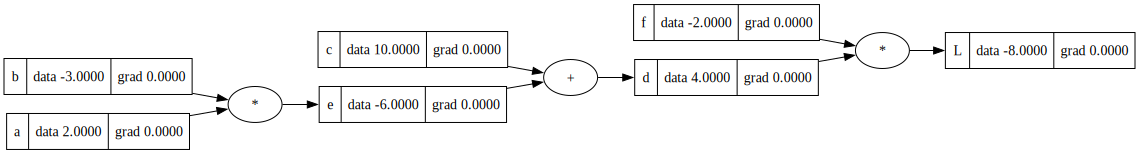

In [18]:
draw_dot(L)

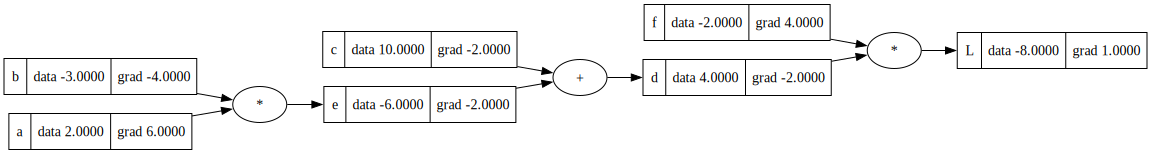

In [19]:
L.backward()
draw_dot(L)

#### Training Simple Neural Network

In [20]:
# Simple Binary Classifier Dataset
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

In [21]:
import simplenet

importlib.reload(tinybox)
importlib.reload(simplenet)

n = simplenet.MLP(3, [4, 4, 1])
pred = n.predict(xs)
loss = n.mse(ys, pred)
print(loss)

Scalar(data = 5.230517512042234)


In [22]:
print(pred)

[Scalar(data = 0.6994093620224069), Scalar(data = 0.5026295816615509), Scalar(data = 0.6931545900944502), Scalar(data = 0.8755224728708615)]


#### Using SGD as Optimizer

In [23]:
n.sgd(xs, ys, iter=100, lr=0.1)

Scalar(data = 5.230517512042234)
Scalar(data = 3.124109694204914)
Scalar(data = 3.265975023864572)
Scalar(data = 0.8522200891600473)
Scalar(data = 0.5980285902520458)
Scalar(data = 0.37513256318914084)
Scalar(data = 0.18950611770207587)
Scalar(data = 0.1358465069479627)
Scalar(data = 0.11298081421601497)
Scalar(data = 0.09634927736456361)
Scalar(data = 0.08370438008962673)
Scalar(data = 0.07379378966887434)
Scalar(data = 0.06583680122659563)
Scalar(data = 0.0593209680590244)
Scalar(data = 0.05389658739768408)
Scalar(data = 0.04931727347282823)
Scalar(data = 0.0454046966488725)
Scalar(data = 0.042026775255961685)
Scalar(data = 0.03908370816334572)
Scalar(data = 0.03649875608650111)
Scalar(data = 0.034211995559411526)
Scalar(data = 0.03217598824155243)
Scalar(data = 0.03035271612238864)
Scalar(data = 0.028711372550696126)
Scalar(data = 0.027226743704405015)
Scalar(data = 0.02587800491846228)
Scalar(data = 0.024647813363842953)
Scalar(data = 0.02352161563375489)
Scalar(data = 0.0224871133

In [24]:
n.predict(xs)

[Scalar(data = 0.9665305308034878),
 Scalar(data = -0.9816976668579698),
 Scalar(data = -0.9519003049965526),
 Scalar(data = 0.9664850587537932)]

- Output is very close to the Ground Truth, Increasing Epochs might improve performance.